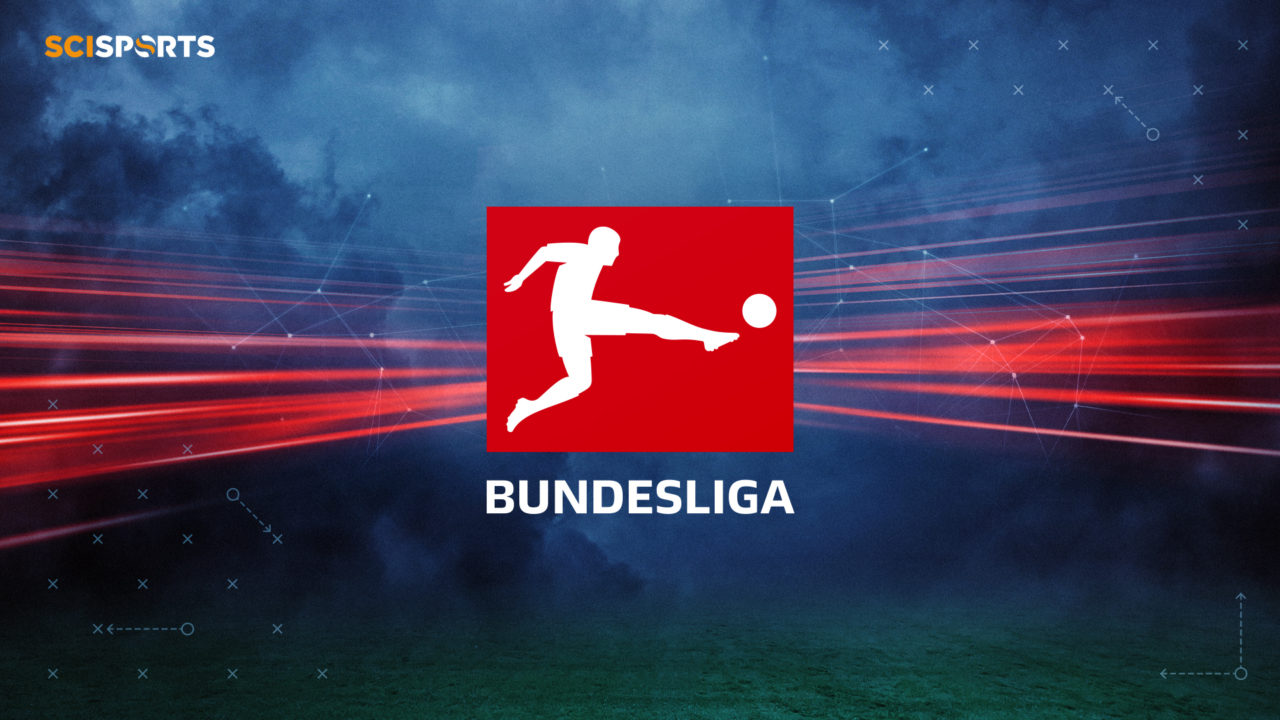

# The Data

We are using data publicly provided by https://football-data.co.uk/ and from https://www.kaggle.com/datasets/slehkyi/extended-football-stats-for-european-leagues-xg?resource=download. The data that we exctracted and we are going to use are listed below:

- **FTR**: Full Time Result ('H'=home win, 'A'= Away win, 'D'= Draw)
- **Date**: Match Date
- **HomeTeam**: Home Team
- **AwayTeam**: Away Team
- **FTHG**: Full Time Home Team Goals
- **FTAG**: Full Time Away Team Goals
- **HTHG**: Half Time Home Team Goals
- **HTAG**: Half Time Away Team Goals
- **HS**: Home Team Shots
- **AS**: Away Team Shots
- **HST**: Home Team Shots on Target
- **AST**: Away Team Shots on Target
- **HC**: Home Team Corners
- **AC**: Away Team Corners
- **HF**: Home Team Fouls
- **AF**: Away Team Fouls
- **league**: League
- **HxG**: Home Team xGoals
- **AxG**: Away Team xGoals
- **Hdeep**: Passes that home team completed within an estimated 20 yards of goal (crosses excluded)
- **Adeep**: Passes that away team completed within an estimated 20 yards of goal (crosses excluded)
- **Hppda_coef**: Passes that home team allowed per defensive action in the opposition half (power of pressure)
- **Appda_coef**: Passes that away team allowed per defensive action in the opposition half (power of pressure)
- **AVGH**: Average Home Win Odds 
- **AVGD**: Average Draw Odds
- **AVGA**: Average Away Win Odds
- **season**: Season

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
plt.style.use('bmh')

In [27]:
s1415 = pd.read_csv(r'C:\Users\George\Desktop\football-match-prediction-using-ml-techniques\data\Bundesliga\bundesliga-1415.csv')
s1516 = pd.read_csv(r'C:\Users\George\Desktop\football-match-prediction-using-ml-techniques\data\Bundesliga\bundesliga-1516.csv')
s1617 = pd.read_csv(r'C:\Users\George\Desktop\football-match-prediction-using-ml-techniques\data\Bundesliga\bundesliga-1617.csv')
s1718 = pd.read_csv(r'C:\Users\George\Desktop\football-match-prediction-using-ml-techniques\data\Bundesliga\bundesliga-1718.csv')
s1819 = pd.read_csv(r'C:\Users\George\Desktop\football-match-prediction-using-ml-techniques\data\Bundesliga\bundesliga-1819.csv')
s1920 = pd.read_csv(r'C:\Users\George\Desktop\football-match-prediction-using-ml-techniques\data\Bundesliga\bundesliga-1920.csv')

In [28]:
df = pd.concat([s1415, s1516, s1617, s1718, s1819, s1920]).reset_index(drop=True)

In [29]:
df.head()

Date       HomeTeam    AwayTeam  FTHG  FTAG  HTHG  HTAG FTR  HS  AS  \
0  2014-08-22  Bayern Munich   Wolfsburg     2     1     1     0   H  17   9   
1  2014-08-23       Dortmund  Leverkusen     0     2     0     1   A  11  11   
2  2014-08-23  Ein Frankfurt    Freiburg     1     0     1     0   H  10  13   
3  2014-08-23        FC Koln     Hamburg     0     0     0     0   D  10  19   
4  2014-08-23       Hannover  Schalke 04     2     1     0     0   H   8  12   

   ...  Hdeep  Adeep  Hppda_coef  Appda_coef  AVGH  AVGD   AVGA     season  \
0  ...      5      4    9.625000   21.850000  1.26  6.37  11.50  2014/2015   
1  ...      2      5    3.333333    5.800000  1.62  4.23   5.39  2014/2015   
2  ...      3     13   10.517241    3.465116  2.06  3.46   3.76  2014/2015   
3  ...      4      2   13.080000    7.068966  2.04  3.59   3.67  2014/2015   
4  ...      4      3    9.642857    6.055556  3.11  3.44   2.34  2014/2015   

   ranking_HT_ls  ranking_AT_ls  
0            1.0            5.0  
1            2.0            4.0  
2           13.0           14.0  
3           -1.0           16.0  
4           10.0            3.0  

[5 rows x 29 columns]

In [30]:
df.tail()

Date       HomeTeam            AwayTeam  FTHG  FTAG  HTHG  HTAG  \
1831  2020-06-27     Leverkusen               Mainz     1     0     1     0   
1832  2020-06-27     M'gladbach              Hertha     2     1     1     0   
1833  2020-06-27   Union Berlin  Fortuna Dusseldorf     3     0     1     0   
1834  2020-06-27  Werder Bremen             FC Koln     6     1     3     0   
1835  2020-06-27      Wolfsburg       Bayern Munich     0     4     0     2   

     FTR  HS  AS  ...  Hdeep  Adeep  Hppda_coef  Appda_coef  AVGH  AVGD  \
1831   H  13   6  ...     14      2    5.472222   23.050000  1.25  6.53   
1832   H  22   4  ...      9      4   13.142857   18.571429  1.34  5.60   
1833   H  11  25  ...      4      8   12.045455   10.761905  3.89  3.64   
1834   H  18   6  ...      5      0    9.296296   12.875000  1.60  4.39   
1835   A  11  17  ...      2      7   15.238095   10.315789  4.29  4.50   

       AVGA     season  ranking_HT_ls  ranking_AT_ls  
1831  10.21  2019/2020            4.0           12.0  
1832   8.07  2019/2020            5.0           11.0  
1833   1.95  2019/2020           -3.0           10.0  
1834   5.10  2019/2020            8.0           -1.0  
1835   1.69  2019/2020            6.0            1.0  

[5 rows x 29 columns]

In [31]:
df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'FTR',
       'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'league', 'HxG',
       'AxG', 'Hdeep', 'Adeep', 'Hppda_coef', 'Appda_coef', 'AVGH', 'AVGD',
       'AVGA', 'season', 'ranking_HT_ls', 'ranking_AT_ls'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1836 non-null   object 
 1   HomeTeam       1836 non-null   object 
 2   AwayTeam       1836 non-null   object 
 3   FTHG           1836 non-null   int64  
 4   FTAG           1836 non-null   int64  
 5   HTHG           1836 non-null   int64  
 6   HTAG           1836 non-null   int64  
 7   FTR            1836 non-null   object 
 8   HS             1836 non-null   int64  
 9   AS             1836 non-null   int64  
 10  HST            1836 non-null   int64  
 11  AST            1836 non-null   int64  
 12  HC             1836 non-null   int64  
 13  AC             1836 non-null   int64  
 14  HF             1836 non-null   int64  
 15  AF             1836 non-null   int64  
 16  league         1836 non-null   object 
 17  HxG            1836 non-null   float64
 18  AxG     

In [33]:
df.describe().transpose()

count       mean       std       min        25%        50%  \
FTHG           1836.0   1.643791  1.367796  0.000000   1.000000   1.000000   
FTAG           1836.0   1.295207  1.223743  0.000000   0.000000   1.000000   
HTHG           1836.0   0.720588  0.833777  0.000000   0.000000   1.000000   
HTAG           1836.0   0.549564  0.733210  0.000000   0.000000   0.000000   
HS             1836.0  14.142702  5.231044  1.000000  10.000000  14.000000   
AS             1836.0  11.710784  4.693170  0.000000   8.000000  11.000000   
HST            1836.0   5.100763  2.687377  0.000000   3.000000   5.000000   
AST            1836.0   4.247277  2.397289  0.000000   2.750000   4.000000   
HC             1836.0   5.265251  2.918309  0.000000   3.000000   5.000000   
AC             1836.0   4.392157  2.508802  0.000000   3.000000   4.000000   
HF             1836.0  13.047386  4.267160  2.000000  10.000000  13.000000   
AF             1836.0  13.730937  4.466593  2.000000  11.000000  13.000000   
HxG            1836.0   1.605626  0.934592  0.025462   0.909642   1.450830   
AxG            1836.0   1.259045  0.812003  0.000000   0.660083   1.096935   
Hdeep          1836.0   6.603486  4.056370  0.000000   4.000000   6.000000   
Adeep          1836.0   5.333878  3.637403  0.000000   3.000000   5.000000   
Hppda_coef     1836.0  10.367010  5.824247  1.897436   6.549597   8.892045   
Appda_coef     1836.0  11.974748  8.603520  2.121951   7.000000  10.045833   
AVGH           1836.0   2.829090  2.265960  1.030000   1.717500   2.220000   
AVGD           1836.0   4.224025  1.488717  3.030000   3.450000   3.695000   
AVGA           1836.0   4.640027  4.509174  1.130000   2.450000   3.310000   
ranking_HT_ls  1836.0   7.212963  5.393595 -3.000000   3.000000   7.000000   
ranking_AT_ls  1836.0   7.212963  5.393595 -3.000000   3.000000   7.000000   

                     75%         max  
FTHG            2.000000    8.000000  
FTAG            2.000000    6.000000  
HTHG            1.000000    6.000000  
HTAG            1.000000    4.000000  
HS             17.000000   36.000000  
AS             15.000000   32.000000  
HST             7.000000   16.000000  
AST             6.000000   14.000000  
HC              7.000000   19.000000  
AC              6.000000   14.000000  
HF             16.000000   29.000000  
AF             17.000000   30.000000  
HxG             2.128413    6.029310  
AxG             1.718580    5.940230  
Hdeep           9.000000   32.000000  
Adeep           7.000000   27.000000  
Hppda_coef     12.548790   65.857143  
Appda_coef     14.158421  152.000000  
AVGH            2.900000   22.750000  
AVGD            4.312500   21.000000  
AVGA            4.970000   43.670000  
ranking_HT_ls  12.000000   16.000000  
ranking_AT_ls  12.000000   16.000000

<AxesSubplot:xlabel='FTR', ylabel='count'>

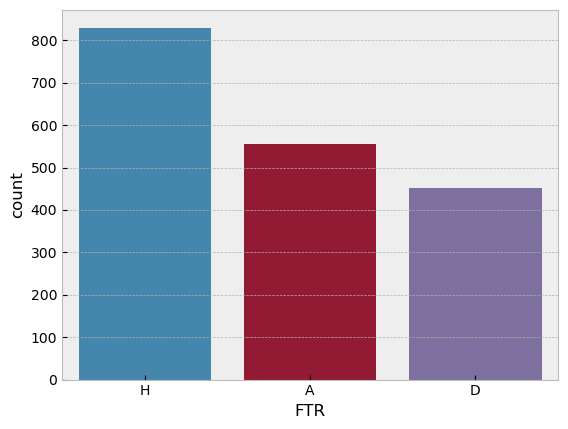

In [34]:
sns.countplot(x='FTR',data=df)

In [35]:
df['FTR'].value_counts()

H    830
A    555
D    451
Name: FTR, dtype: int64

In [36]:
count_H = len(df[df['FTR']=='H'])
count_A = len(df[df['FTR']=='A'])
count_D = len(df[df['FTR']=='D'])

prc_of_H = count_H / (count_H + count_A + count_D)
print("Percentage of home wins is:",round(prc_of_H*100,2),"%")

prc_of_A = count_A / (count_H + count_A + count_D)
print("Percentage of away wins is:",round(prc_of_A*100,2),"%")

prc_of_D = count_D / (count_H + count_A + count_D)
print("Percentage of draws is:",round(prc_of_D*100,2),"%")

Percentage of home wins is: 45.21 %
Percentage of away wins is: 30.23 %
Percentage of draws is: 24.56 %


**First we are going to see the distribution of some important variables**

Text(0.5, 0, 'Half Time Home Goals')

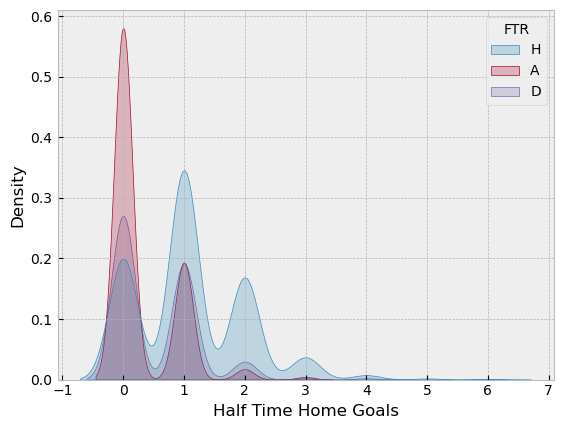

In [37]:
sns.kdeplot(data=df, x='HTHG', hue='FTR',fill=True)

plt.xlabel('Half Time Home Goals')

Text(0.5, 0, 'Half Time Home Goals')

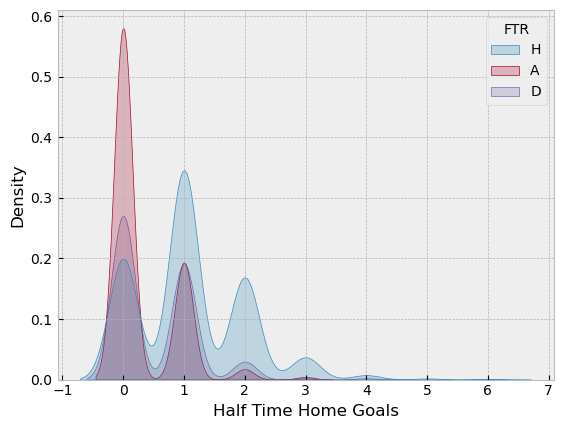

In [38]:
sns.kdeplot(data=df, x='HTHG', hue='FTR',fill=True)

plt.xlabel('Half Time Home Goals')

Text(0.5, 0, 'Average Home Win Odds')

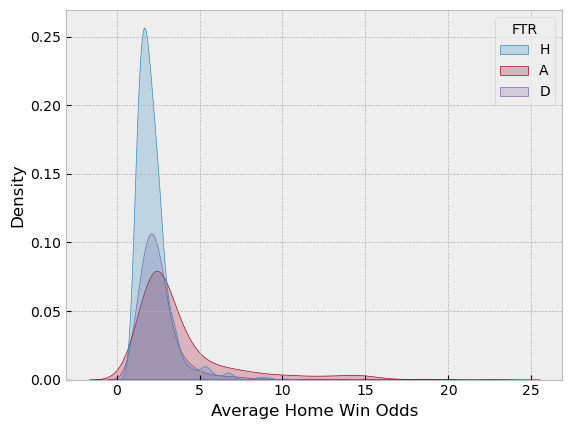

In [39]:
sns.kdeplot(data=df, x='AVGH', hue='FTR',fill=True)

plt.xlabel('Average Home Win Odds')

Text(0.5, 0, 'Average Draw Odds')

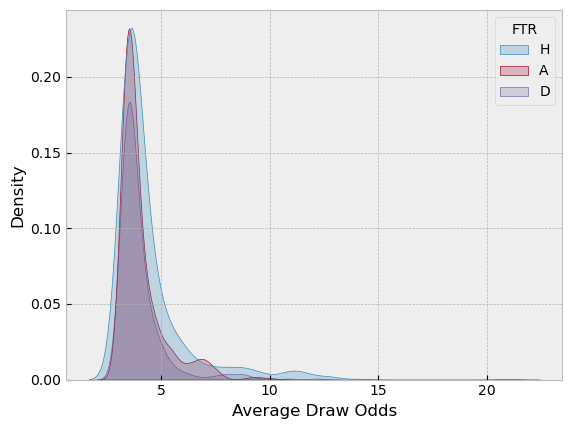

In [40]:
sns.kdeplot(data=df, x='AVGD', hue='FTR', fill=True)

plt.xlabel('Average Draw Odds')

Text(0.5, 0, 'Average Away Win Odds')

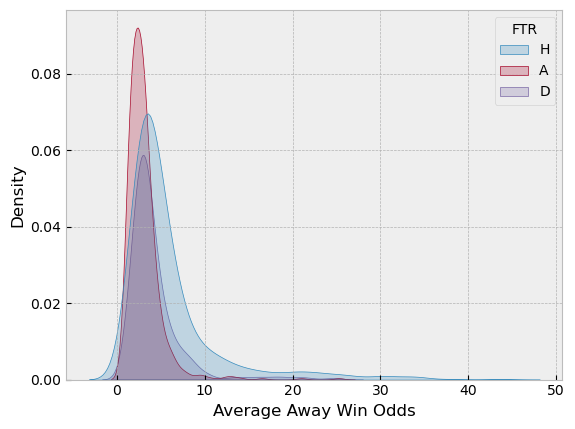

In [41]:
sns.kdeplot(data=df, x='AVGA',hue='FTR', fill=True)

plt.xlabel('Average Away Win Odds')

Text(0.5, 0, 'Home xGoals')

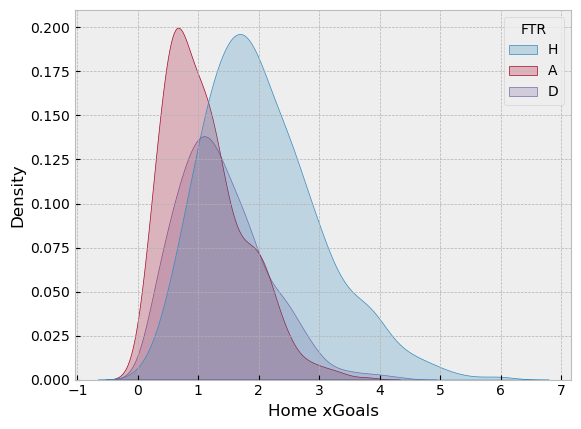

In [42]:
sns.kdeplot(data=df, x='HxG',hue='FTR', fill=True)

plt.xlabel('Home xGoals')

Text(0.5, 0, 'Away xGoals')

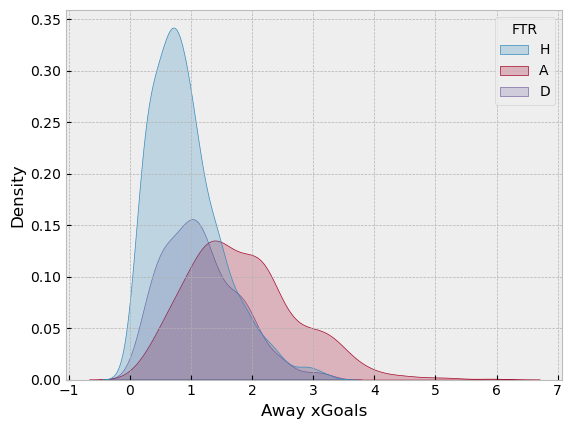

In [43]:
sns.kdeplot(data=df, x='AxG',hue='FTR', fill=True)

plt.xlabel('Away xGoals')

Text(0.5, 0, 'Home Deep')

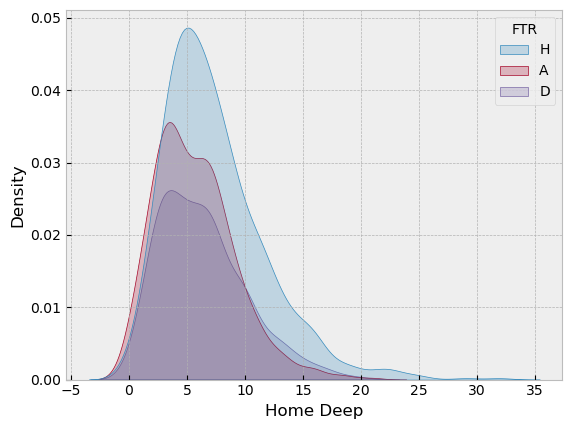

In [44]:
sns.kdeplot(data=df, x='Hdeep',hue='FTR', fill=True)

plt.xlabel('Home Deep')

Text(0.5, 0, 'Away Deep')

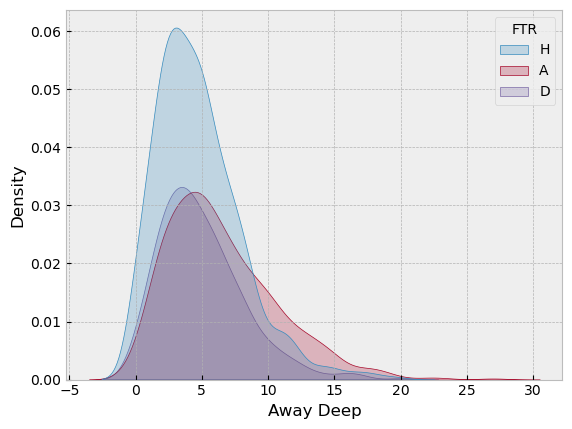

In [45]:
sns.kdeplot(data=df, x='Adeep',hue='FTR', fill=True)

plt.xlabel('Away Deep')

Text(0.5, 0, 'Home Team Power of Pressure')

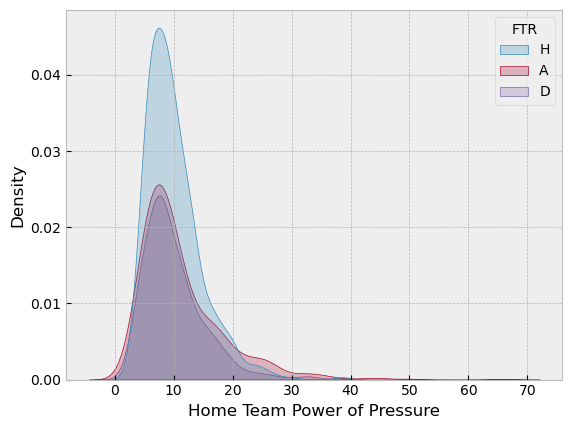

In [46]:
sns.kdeplot(data=df, x='Hppda_coef',hue='FTR', fill=True)

plt.xlabel('Home Team Power of Pressure')

Text(0.5, 0, 'Away Team Power of Pressure')

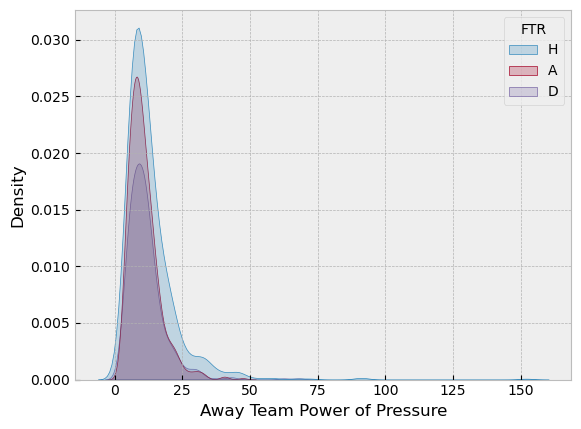

In [47]:
sns.kdeplot(data=df, x='Appda_coef',hue='FTR', fill=True)

plt.xlabel('Away Team Power of Pressure')

Text(0.5, 0, 'Full Time Home Team Goals')

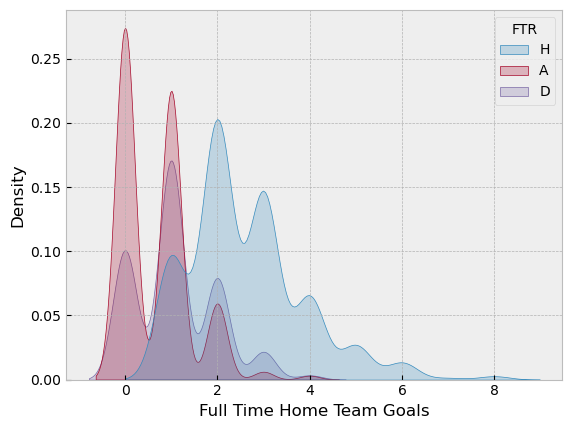

In [48]:
sns.kdeplot(data=df, x='FTHG',hue='FTR', fill=True)

plt.xlabel('Full Time Home Team Goals')

Text(0.5, 0, 'Full Time Away Team Goals')

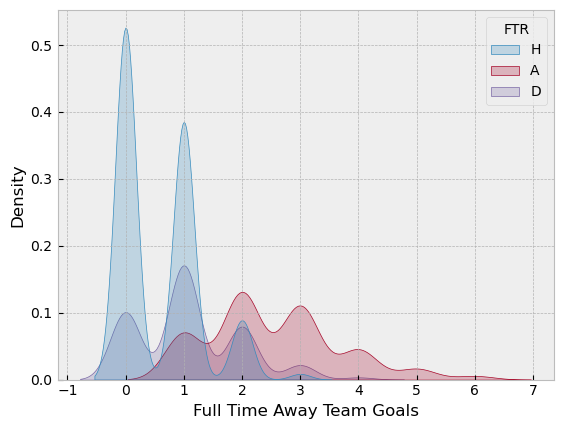

In [49]:
sns.kdeplot(data=df, x='FTAG',hue='FTR', fill=True)

plt.xlabel('Full Time Away Team Goals')

Text(0.5, 0, 'Full Time Home Shots on Target')

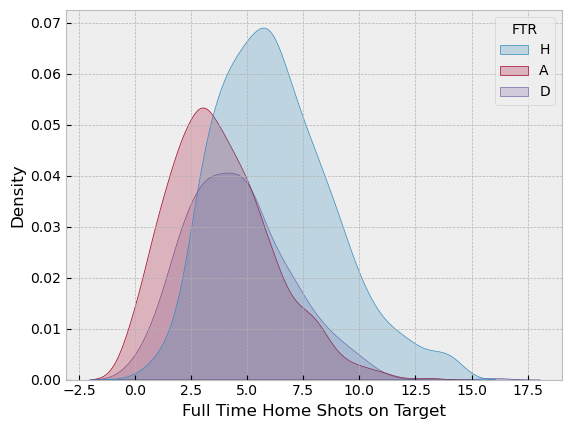

In [50]:
sns.kdeplot(data=df, x='HST',hue='FTR', fill=True)

plt.xlabel('Full Time Home Shots on Target')

Text(0.5, 0, 'Full Time Away Shots on Target')

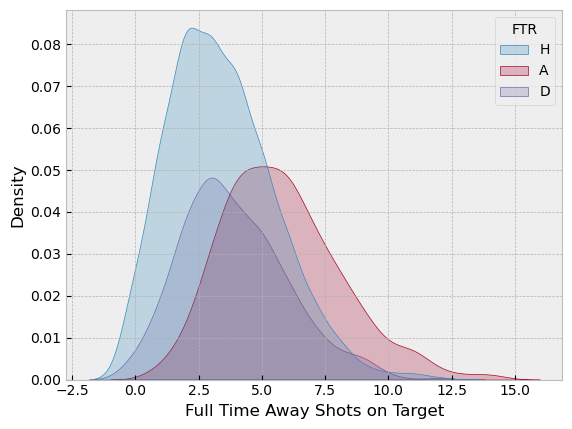

In [51]:
sns.kdeplot(data=df, x='AST',hue='FTR', fill=True)

plt.xlabel('Full Time Away Shots on Target')

Text(0.5, 0, 'Home Team Corners')

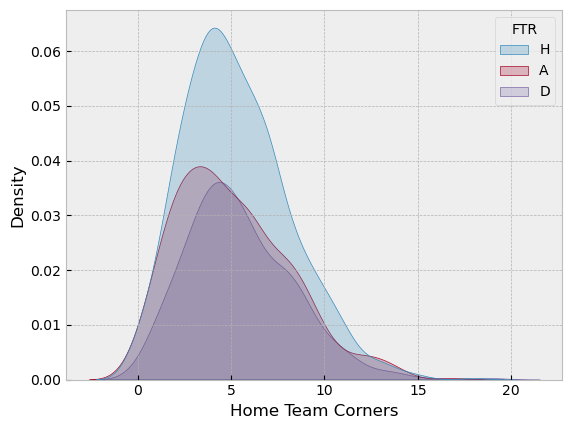

In [52]:
sns.kdeplot(data=df, x='HC',hue='FTR', fill=True)

plt.xlabel('Home Team Corners')

Text(0.5, 0, 'Away Team Corners')

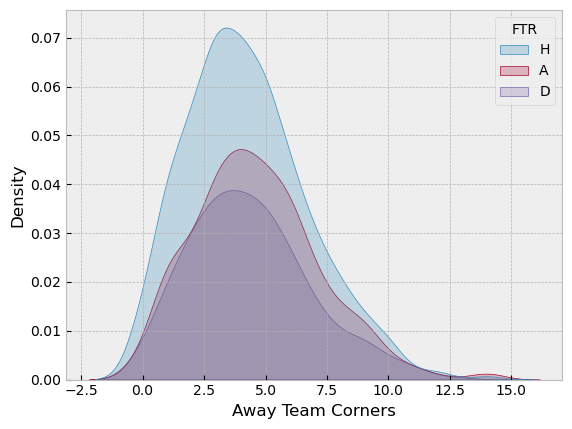

In [53]:
sns.kdeplot(data=df, x='AC',hue='FTR', fill=True)

plt.xlabel('Away Team Corners')

**Now we are going to check how some variables interact with each other.**

<AxesSubplot:>

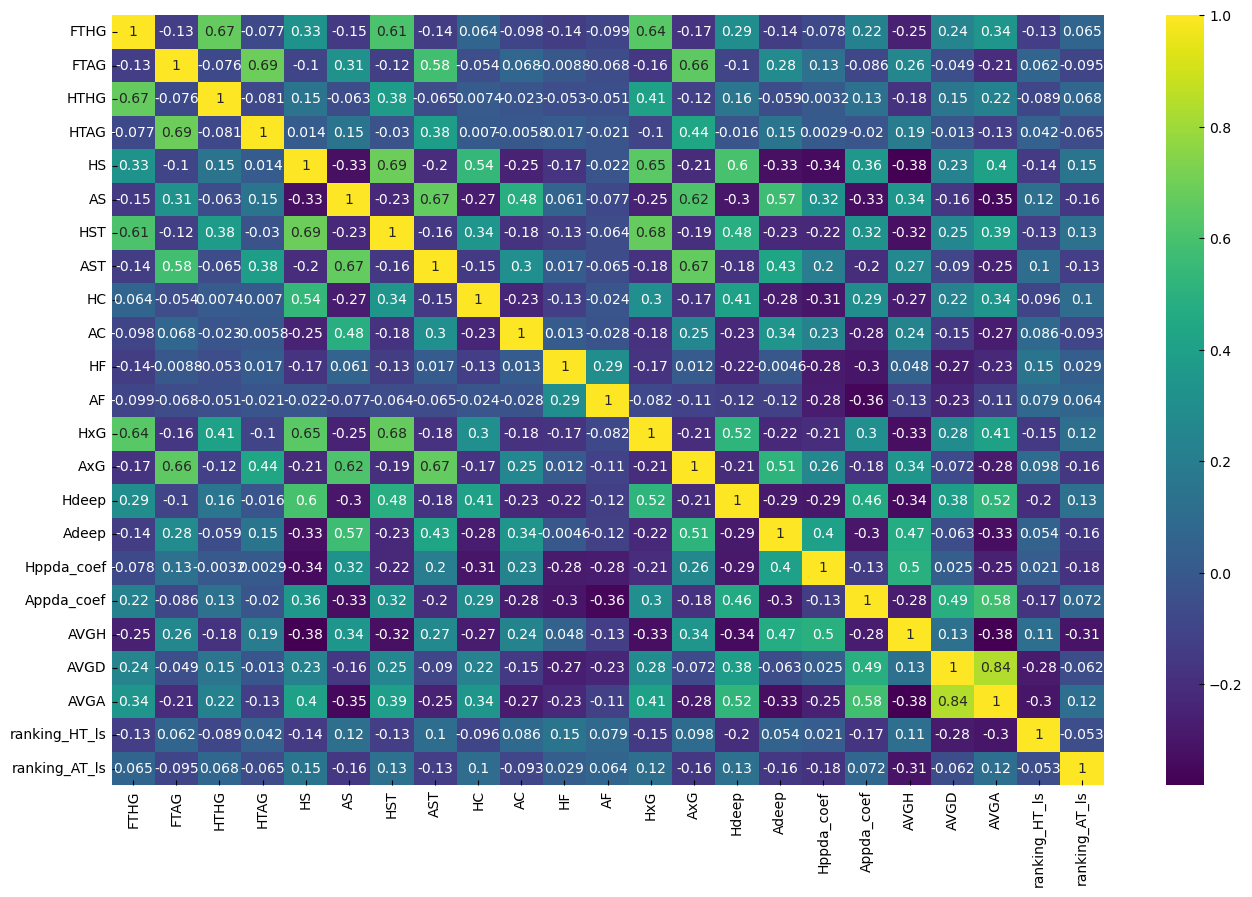

In [54]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True, cmap='viridis')

Text(0, 0.5, 'Half Time Away Goals')

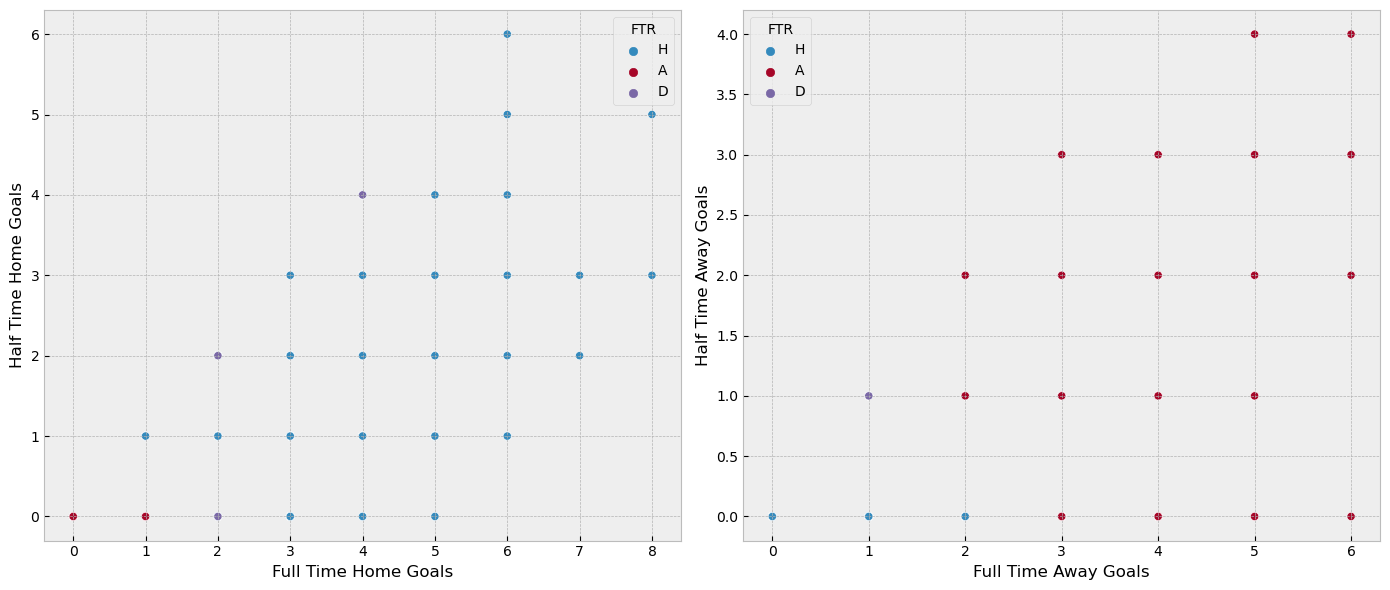

In [77]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='FTHG', y='HTHG', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Full Time Home Goals')
axes[0].set_ylabel('Half Time Home Goals')

sns.scatterplot(x='FTAG', y='HTAG', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Full Time Away Goals')
axes[1].set_ylabel('Half Time Away Goals')

- **"FTHG" and "HTHG" have strong positive correlation.** That makes sense cause goals at the half time means that the team has scored goals in the game.

- The interesting part of the graph is that when the home team scores 0 or 1 goal it usually losses the game.

- We observe the same behavior between the variable "FTAG" and "HTAG".

Text(0, 0.5, 'Away Team Shots on Target')

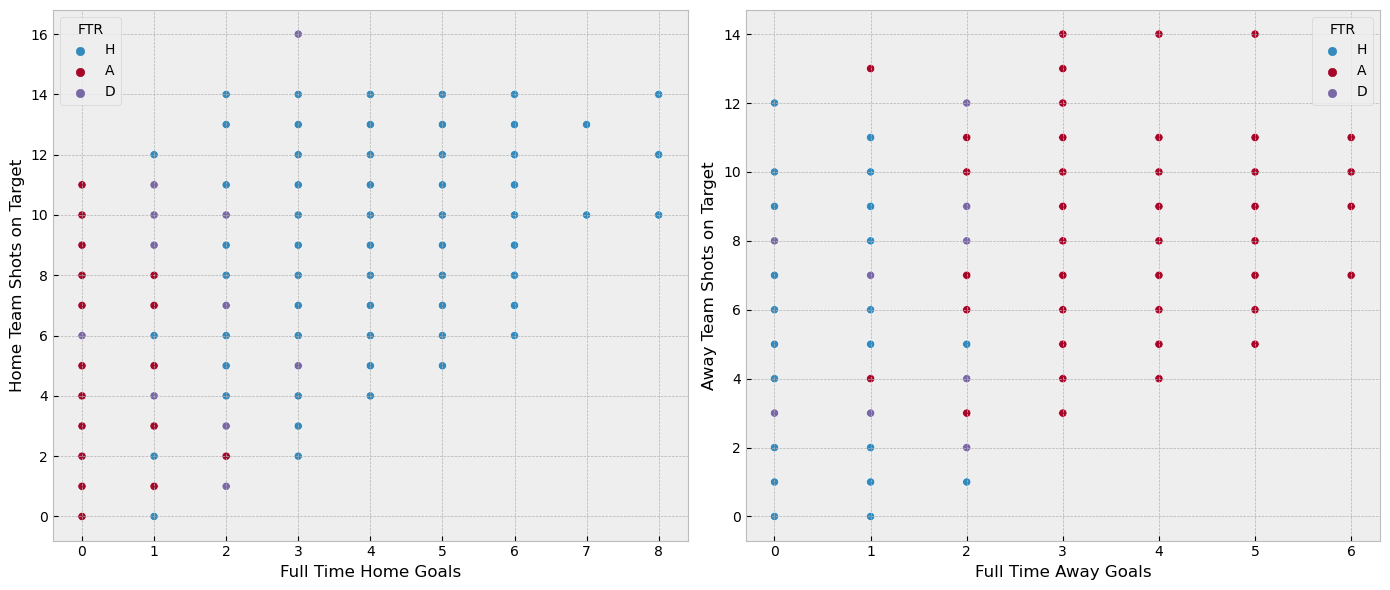

In [56]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='FTHG', y='HST', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Full Time Home Goals')
axes[0].set_ylabel('Home Team Shots on Target')

sns.scatterplot(x='FTAG', y='AST', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Full Time Away Goals')
axes[1].set_ylabel('Away Team Shots on Target')

As we can see from the graph the two variables have strong positive correlation. That makes sense cause a team must create chances in order to score a goal.

Text(0, 0.5, 'Away Team xGoals')

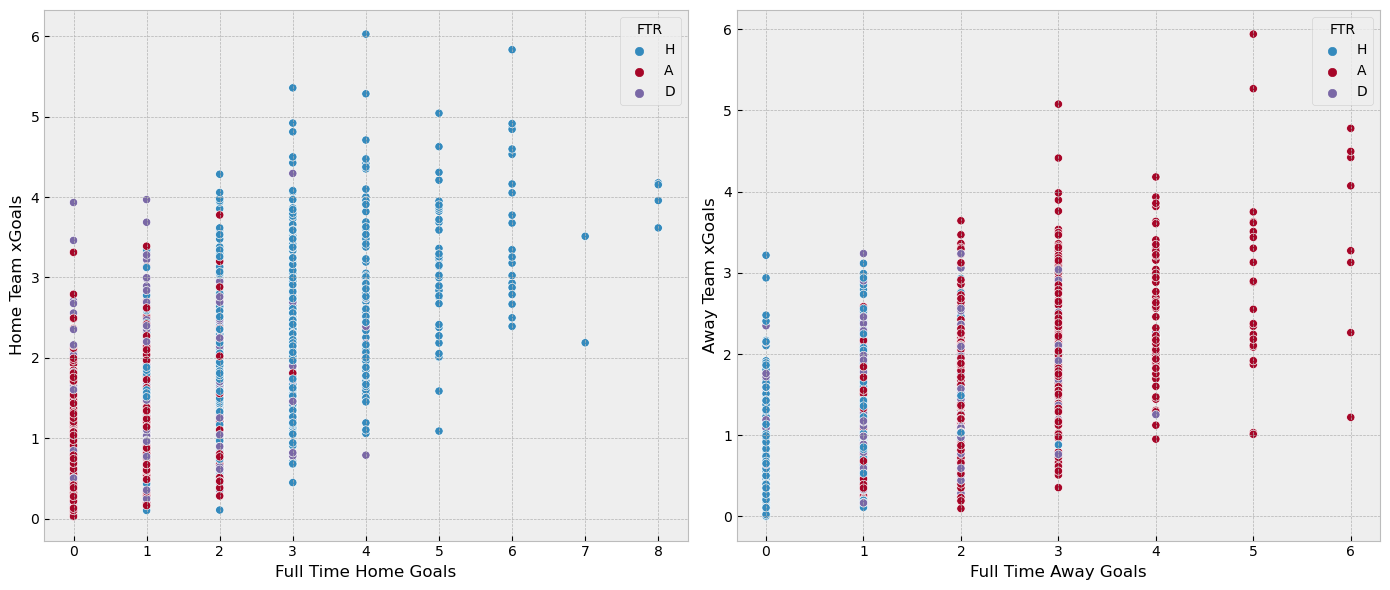

In [57]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='FTHG', y='HxG', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Full Time Home Goals')
axes[0].set_ylabel('Home Team xGoals')

sns.scatterplot(x='FTAG', y='AxG', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Full Time Away Goals')
axes[1].set_ylabel('Away Team xGoals')

Expected goals (or xG) measures the quality of a chance by calculating the likelihood that it will be scored from a particular position on the pitch during a particular phase of play. **So the higher the indicator of xG the more possible is for the team to score goals.**

<AxesSubplot:xlabel='HS', ylabel='AS'>

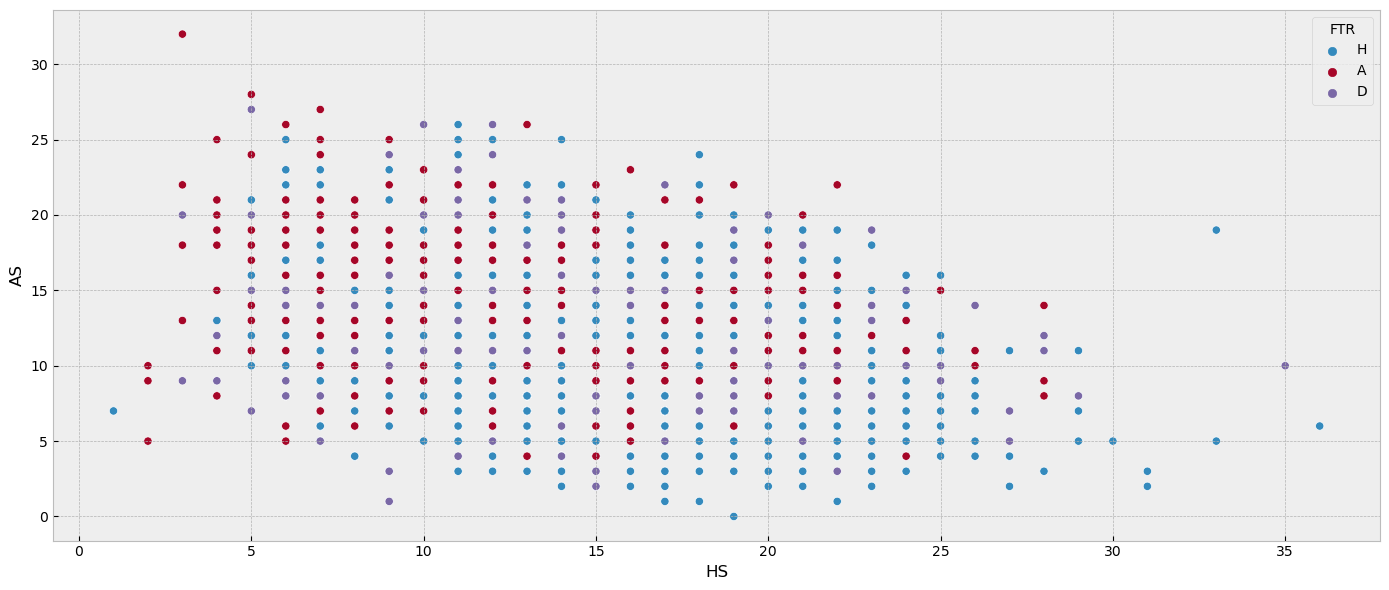

In [58]:
sns.scatterplot(x='HS',y='AS', data=df,hue='FTR')

- It make sense for **HS** and **AS** to have moderate negative correlation. When one of the two teams create more chances it probably has more possesion of the ball throughout the game so the other team create less chances.

- When it comes to predicting the game outcome, we can not actually make an insight.

Text(0, 0.5, 'Away Team Shots on Target')

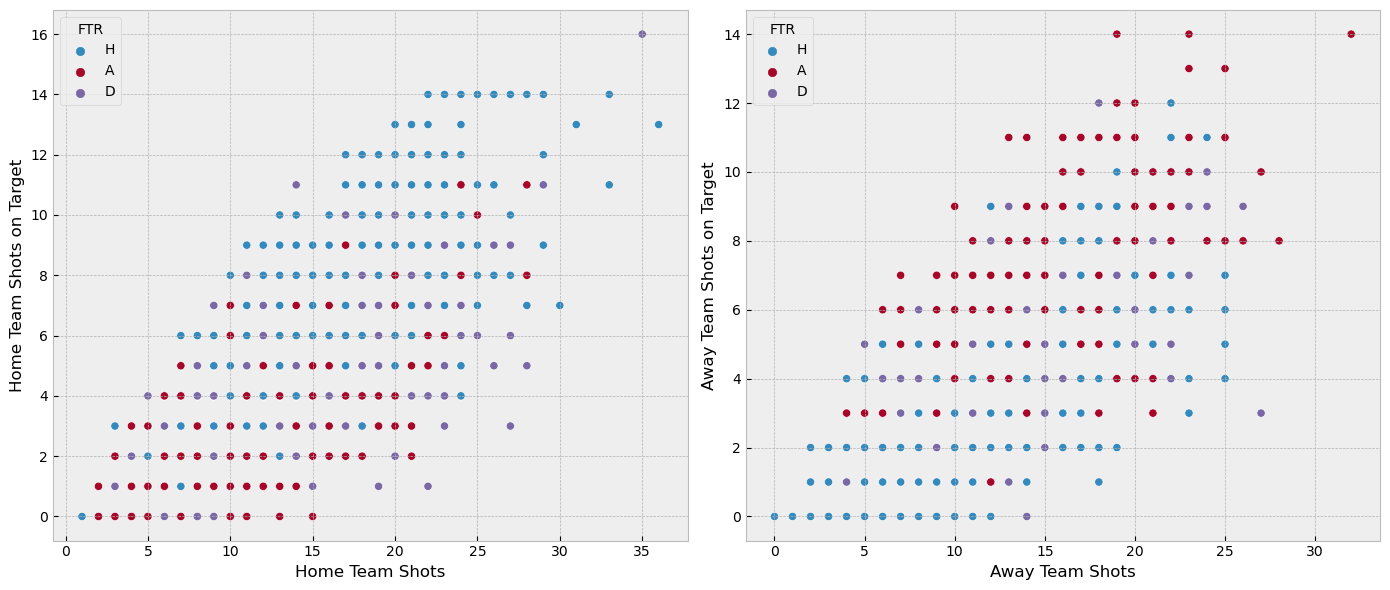

In [59]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HS', y='HST', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Home Team Shots')
axes[0].set_ylabel('Home Team Shots on Target')

sns.scatterplot(x='AS', y='AST', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Away Team Shots')
axes[1].set_ylabel('Away Team Shots on Target')

The more shots a team does the more possible is for the ball to find the target. That explains the **strong positive correlation** between the two variables.

Text(0, 0.5, 'Away Team Corners')

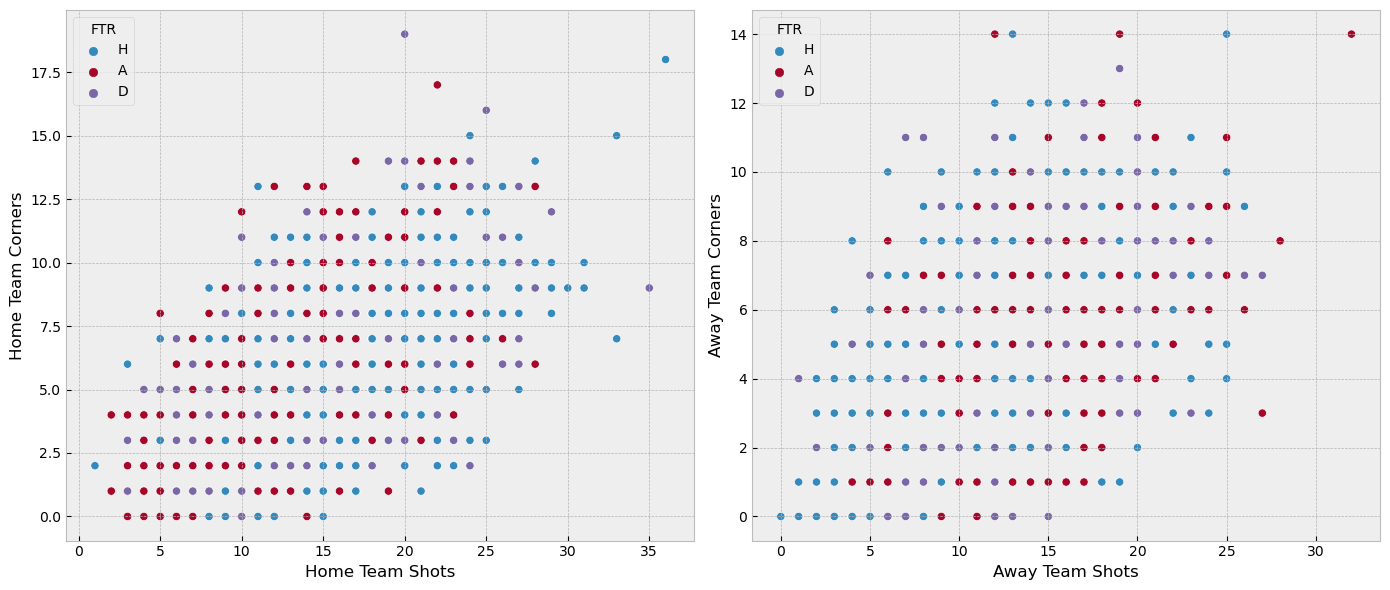

In [60]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HS', y='HC', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Home Team Shots')
axes[0].set_ylabel('Home Team Corners')

sns.scatterplot(x='AS', y='AC', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Away Team Shots')
axes[1].set_ylabel('Away Team Corners')

When a team creates a lot of chances it is highly possible that this team will be awarded a corner. That explains the **moderate positive correlation** that these two variables have.



Text(0, 0.5, 'Away Team xG')

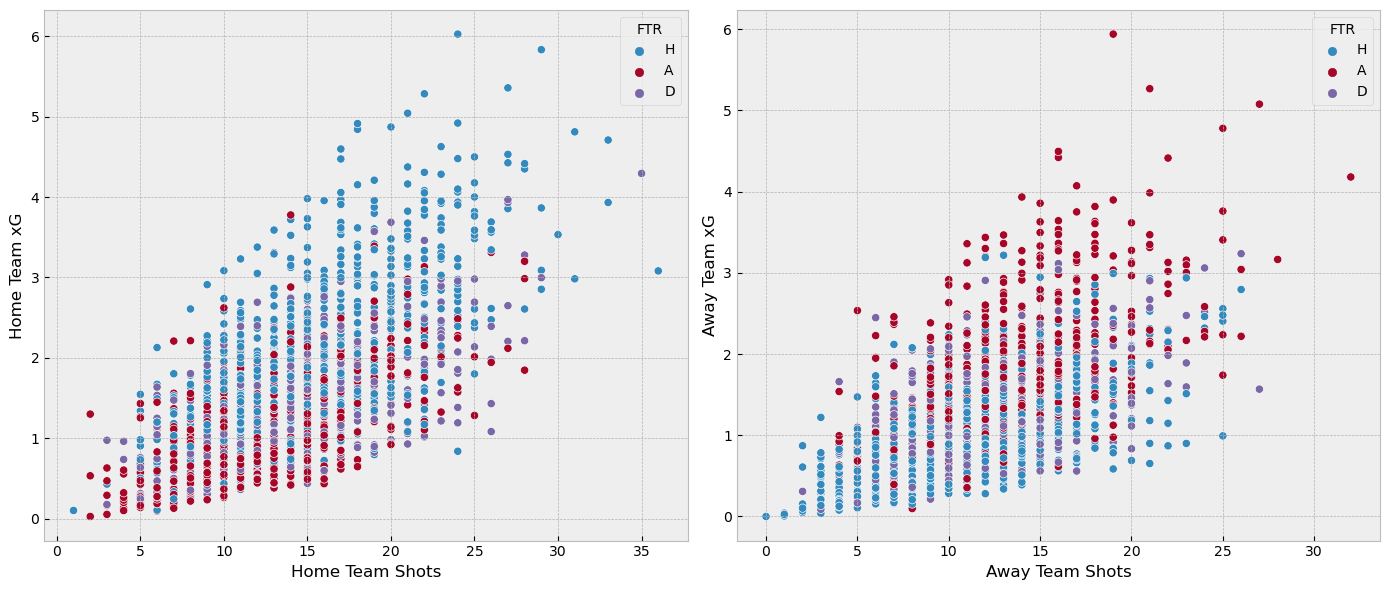

In [61]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HS', y='HxG', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Home Team Shots')
axes[0].set_ylabel('Home Team xG')

sns.scatterplot(x='AS', y='AxG', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Away Team Shots')
axes[1].set_ylabel('Away Team xG')

- A team that does high number of shots per game, is more possible to create high quality goalscoring opportunities. 

- An interesting insight from these two graphs is that when the xGoal indicator of team is high it is more possible that this team is going to win. **Expected goals seems to be a good factor to take into account when you want to predict a football match outcome.**  

Text(0, 0.5, 'Away Team deep')

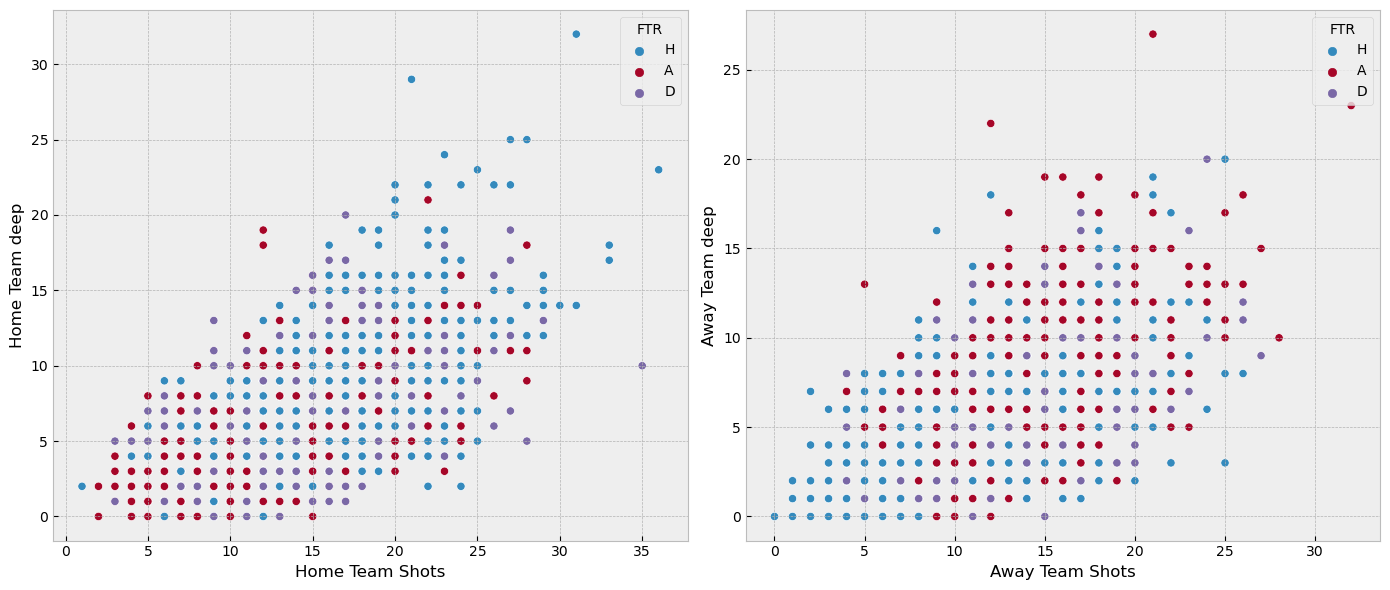

In [62]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HS', y='Hdeep', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Home Team Shots')
axes[0].set_ylabel('Home Team deep')

sns.scatterplot(x='AS', y='Adeep', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Away Team Shots')
axes[1].set_ylabel('Away Team deep')

- Passes that are completed by a team within an estimated 20 yards of goal are probably going to lead to shots. That explains the strong positive correlation between the variables.

- When it comes to the prediction of the football match outcomes **Deep** alone cannot add up to the possible outcome, but if we combine it with other factors like **xG** it is going to be really helpfull.

Text(0, 0.5, 'Average Away Win Odds')

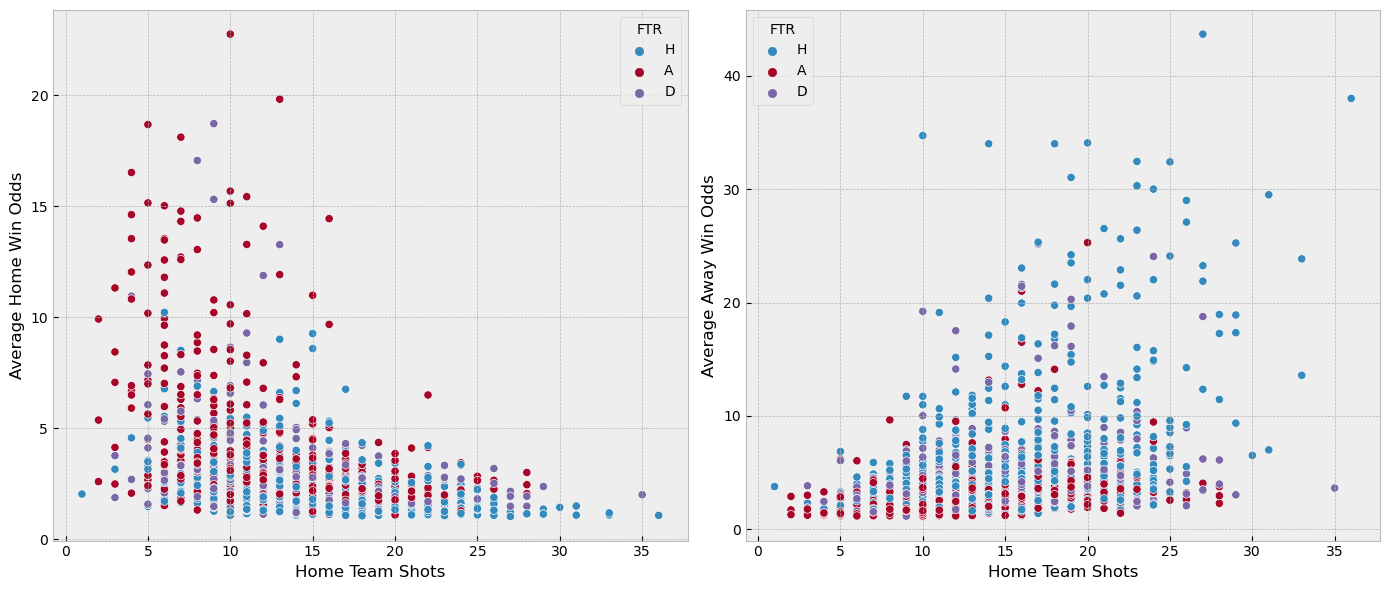

In [63]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HS', y='AVGH', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Home Team Shots')
axes[0].set_ylabel('Average Home Win Odds')

sns.scatterplot(x='HS', y='AVGA', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Home Team Shots')
axes[1].set_ylabel('Average Away Win Odds')

- Low values of win odds indicate that the home team is favorite to win. The lower the value of the odds the stronger the home team, so the possibility of this team to create a high number of chances is higher.

- The same thing happens with the away win odds. The lower the away win odds are the less possible for the home team is to create a lot of chances. But as the value of the odds is getting higher the home team probably will create more chances.

Text(0, 0.5, 'Average Home Win Odds')

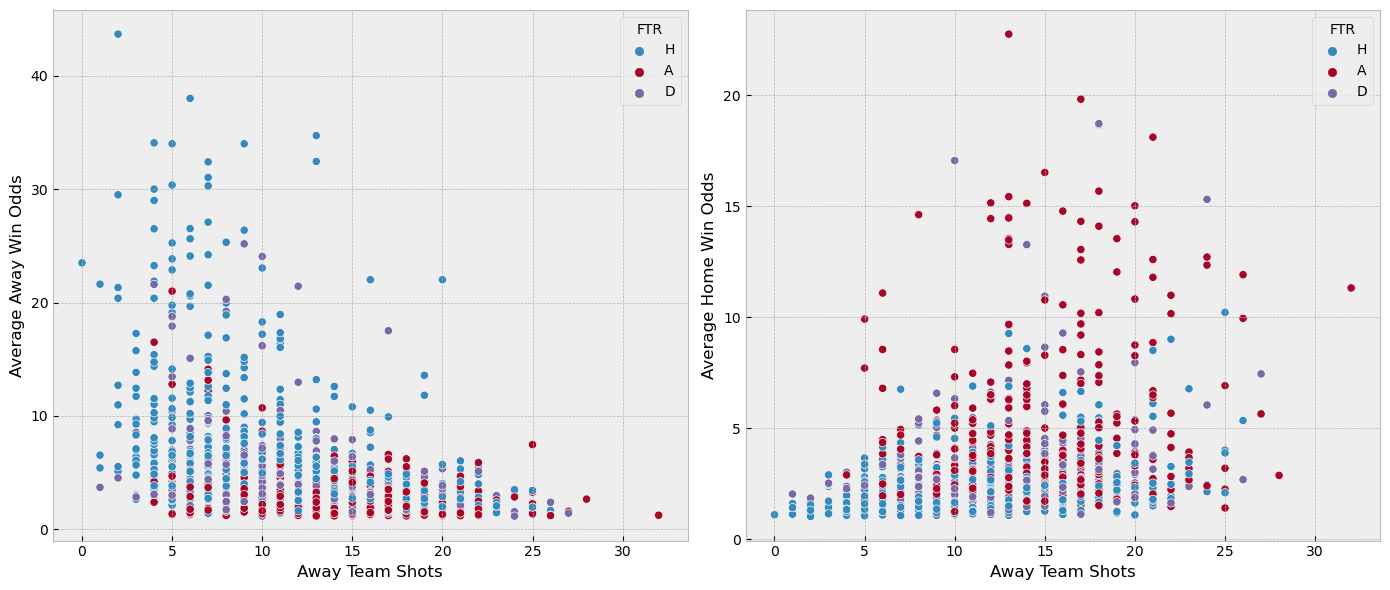

In [64]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='AS', y='AVGA', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Away Team Shots')
axes[0].set_ylabel('Average Away Win Odds')

sns.scatterplot(x='AS', y='AVGH', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Away Team Shots')
axes[1].set_ylabel('Average Home Win Odds')

We observe the same behavior that "HS" has with the odds.

Text(0, 0.5, 'Away Team xG')

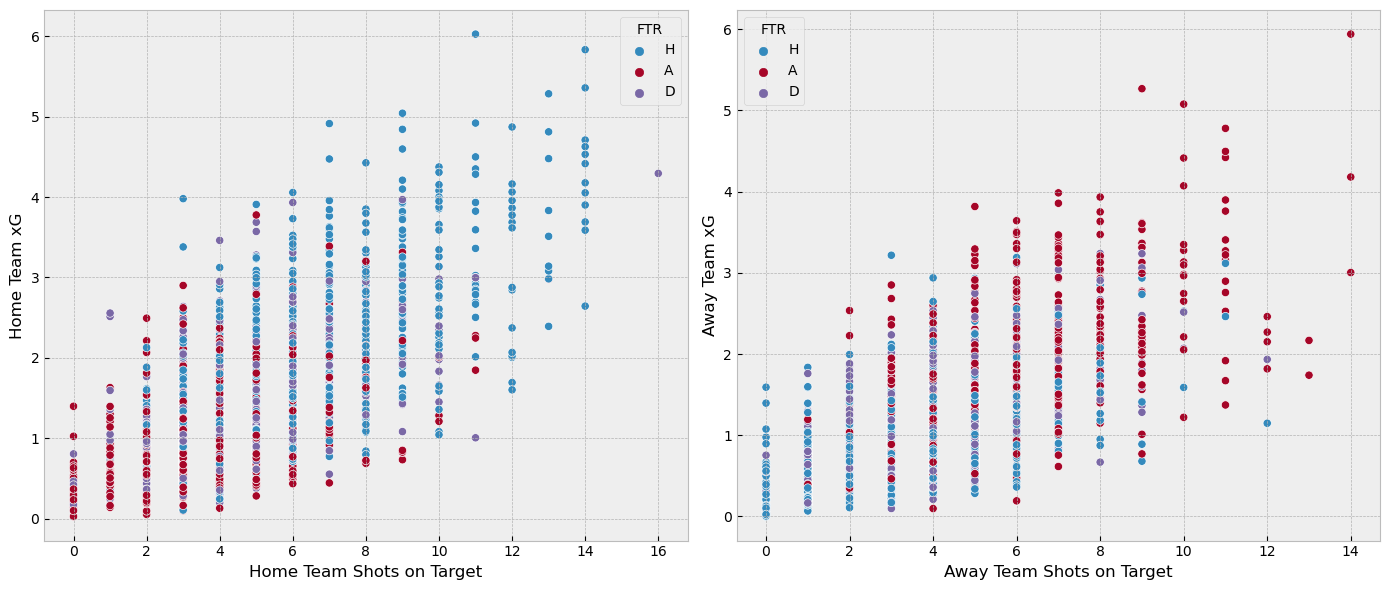

In [65]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HST', y='HxG', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Home Team Shots on Target')
axes[0].set_ylabel('Home Team xG')

sns.scatterplot(x='AST', y='AxG', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Away Team Shots on Target')
axes[1].set_ylabel('Away Team xG')

A team that does high number of shots per game that are on target is going to create high quality goalscoring opportunities. That is the reason that these two variable have **strong positive correlation**.

Text(0, 0.5, 'Away Team deep')

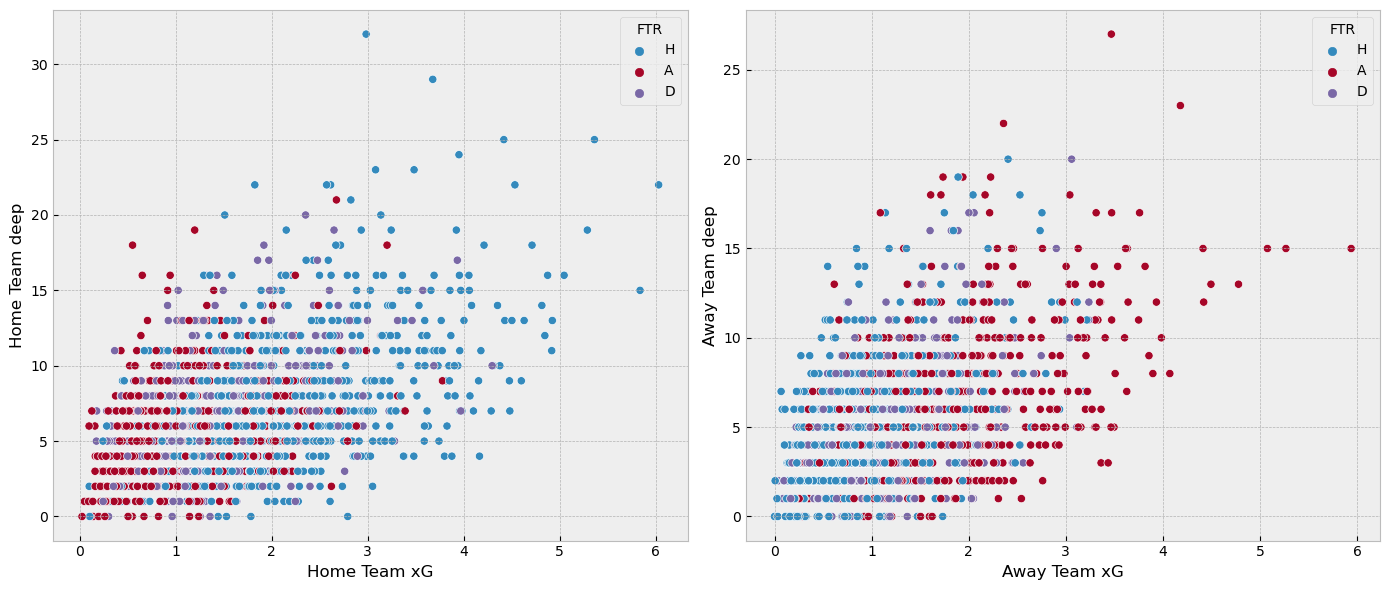

In [66]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HxG', y='Hdeep', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Home Team xG')
axes[0].set_ylabel('Home Team deep')

sns.scatterplot(x='AxG', y='Adeep', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Away Team xG')
axes[1].set_ylabel('Away Team deep')

- A team that manages to complete passes within a 20 yard from goal it is highly possible that it is going to create high quality goalscoring opportunities.

- From the two graphs we observe that as these two factors are increasing the outcome of the match seems to be more distinct.

Text(0, 0.5, 'Average Away Win Odds')

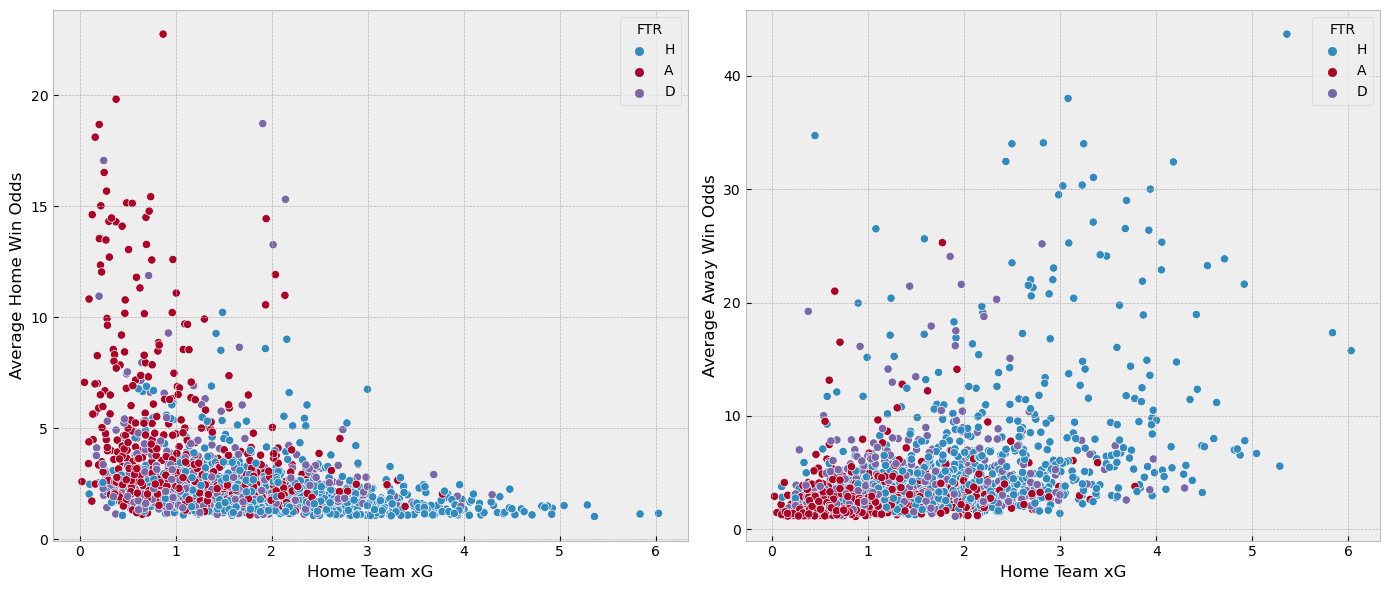

In [67]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HxG', y='AVGH', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Home Team xG')
axes[0].set_ylabel('Average Home Win Odds')

sns.scatterplot(x='HxG', y='AVGA', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Home Team xG')
axes[1].set_ylabel('Average Away Win Odds')

- From the first graph we can see that when the home team xG has low prices the average home win odds are usually high. That probably has to do with the dynamics of the two teams. When the home team creates more high quality goal usually the home win odds are low.

-  From the second graph we can see that when the home team xG has low prices the average away win odds are usually low. That probably has to do with the dynamics of the two teams. When the home team creates more high quality goal usually the away win odds are high.

Text(0, 0.5, 'Average Away Win Odds')

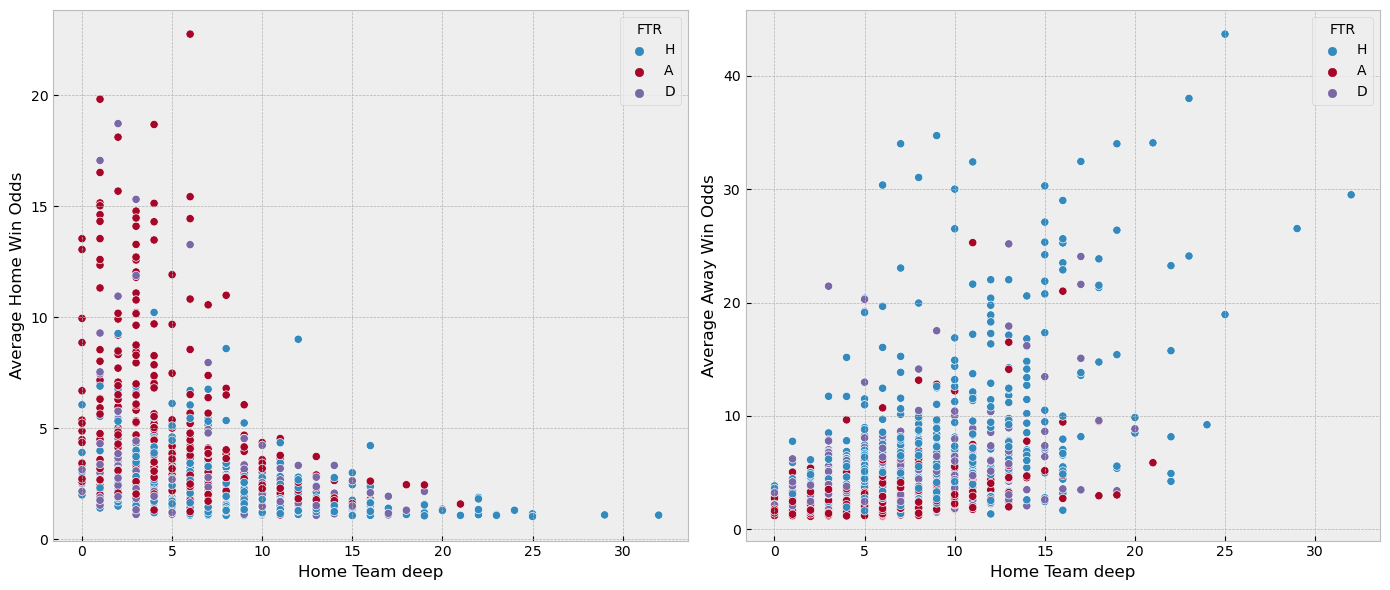

In [68]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='Hdeep', y='AVGH', data=df,hue='FTR', ax=axes[0])
axes[0].set_xlabel('Home Team deep')
axes[0].set_ylabel('Average Home Win Odds')

sns.scatterplot(x='Hdeep', y='AVGA', data=df,hue='FTR', ax=axes[1])
axes[1].set_xlabel('Home Team deep')
axes[1].set_ylabel('Average Away Win Odds')

- The team that manage to completes a lot of passes within 20 yards from goal usuallly is the favorite to win the game. That is the reason that the average home win odds are getting higher as the **"deep"** factor is getting lower.

- The exact opposite happens between the **"deep"** factor and **the average away win odds.**

We expect the same behaviour between the away team **"deep"** and the game odds.

Text(0, 0.5, 'Average Away Win Odds')

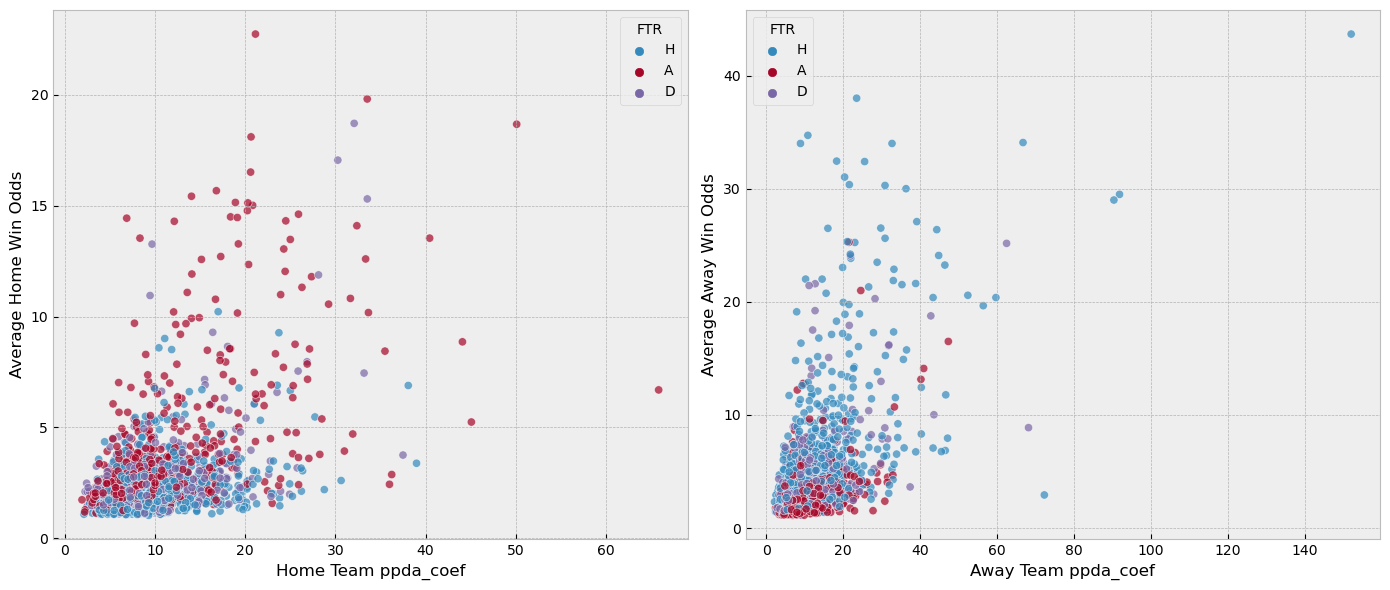

In [69]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='Hppda_coef', y='AVGH', data=df,hue='FTR',alpha=0.7, ax=axes[0])
axes[0].set_xlabel('Home Team ppda_coef')
axes[0].set_ylabel('Average Home Win Odds')

sns.scatterplot(x='Appda_coef', y='AVGA', data=df,hue='FTR',alpha=0.7, ax=axes[1])
axes[1].set_xlabel('Away Team ppda_coef')
axes[1].set_ylabel('Average Away Win Odds')

A team that lets its opponent to build up the game with ease it is more possible to concede a goal. That is the main reason that if the deep factor is getting higher then the team's winning odds are also getting higher.

Text(0, 0.5, 'Average Away Win Odds')

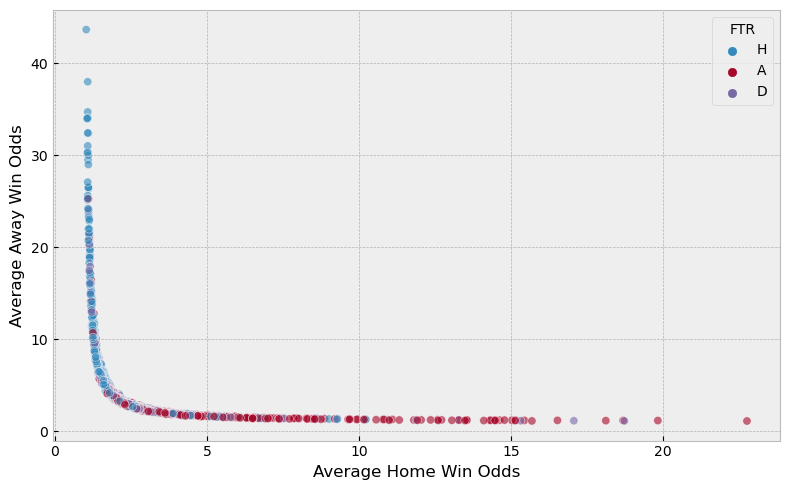

In [70]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'AVGH', y='AVGA', data=df, hue='FTR', alpha=0.6)

plt.xlabel("Average Home Win Odds")
plt.ylabel("Average Away Win Odds")

- **The two odds have moderate negative correlation**. It is something that we have anticipated cause the winning odds are based on the dynamics of home and away team.

- When the average home win odd is low and the average away win odd is high we can see that most of the times the result is going to be home win. When the odds are quite balanced the prediction of the match is a bit harder, because as we can see the outcome of the match could also be a draw or an away win. When the home win odds are high and the away win odds are low we can see that the outcome of the game probably is going to be away win but there are also a lot of cases that the result is draw. We can clearly see that the two odds a relatively negative correlated.

Text(0, 0.5, 'Average Away Win Odds')

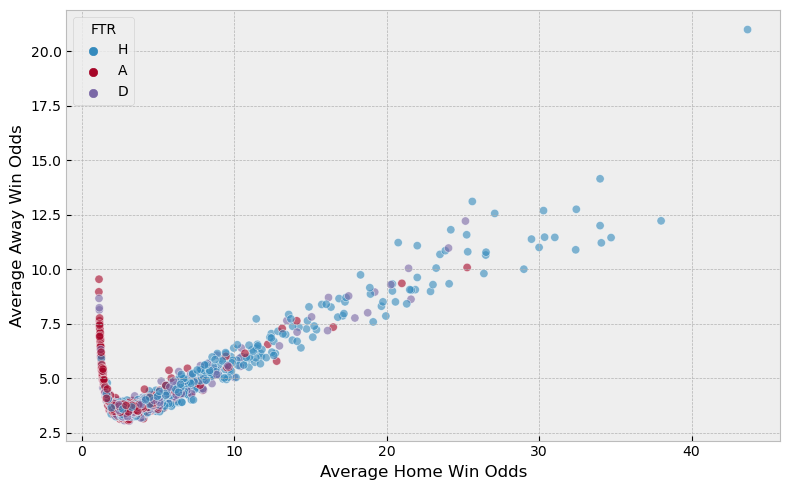

In [79]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'AVGA', y='AVGD', data=df, hue='FTR', alpha=0.6)

plt.xlabel("Average Home Win Odds")
plt.ylabel("Average Away Win Odds")

Text(0, 0.5, 'Average Away Win Odds')

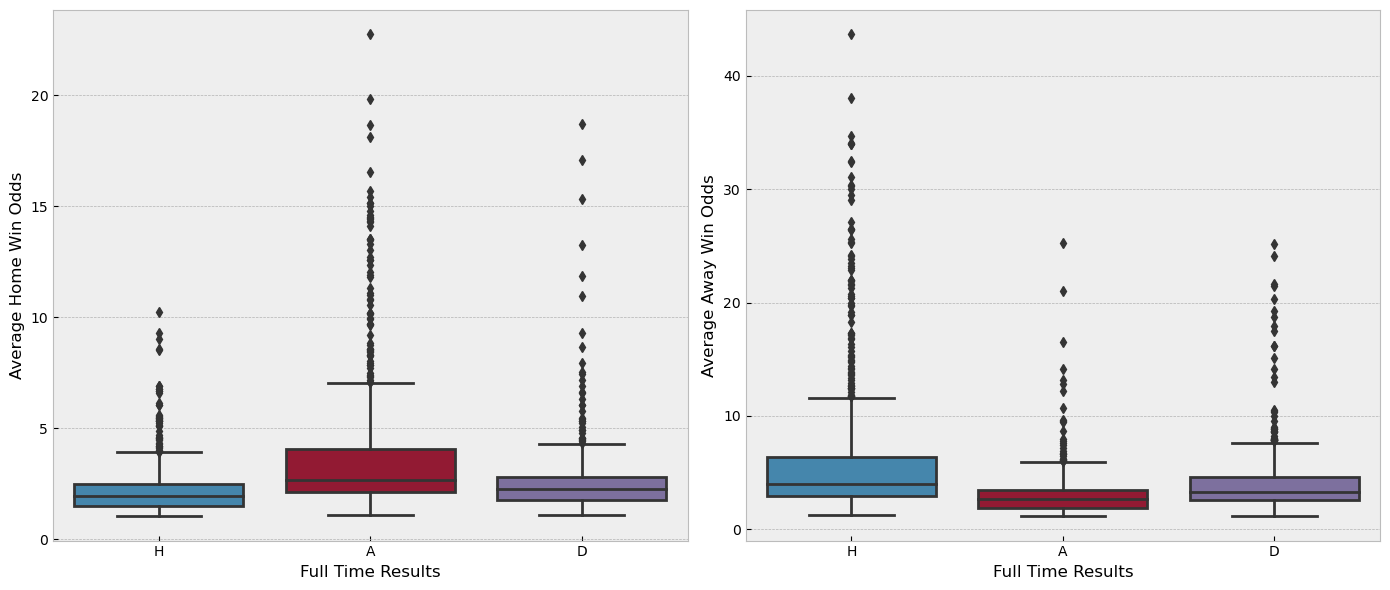

In [72]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(x='FTR', y='AVGH', data=df, ax=axes[0])
axes[0].set_xlabel('Full Time Results')
axes[0].set_ylabel('Average Home Win Odds')

sns.boxplot(x='FTR', y='AVGA', data=df, ax=axes[1])
axes[1].set_xlabel('Full Time Results')
axes[1].set_ylabel('Average Away Win Odds')

**Betting odds are good factors to take into account when you want to predict a football game outcome.** But that doesn't meAN that you must always decide the result based on the odds.

Text(0, 0.5, 'Away Team xGoals')

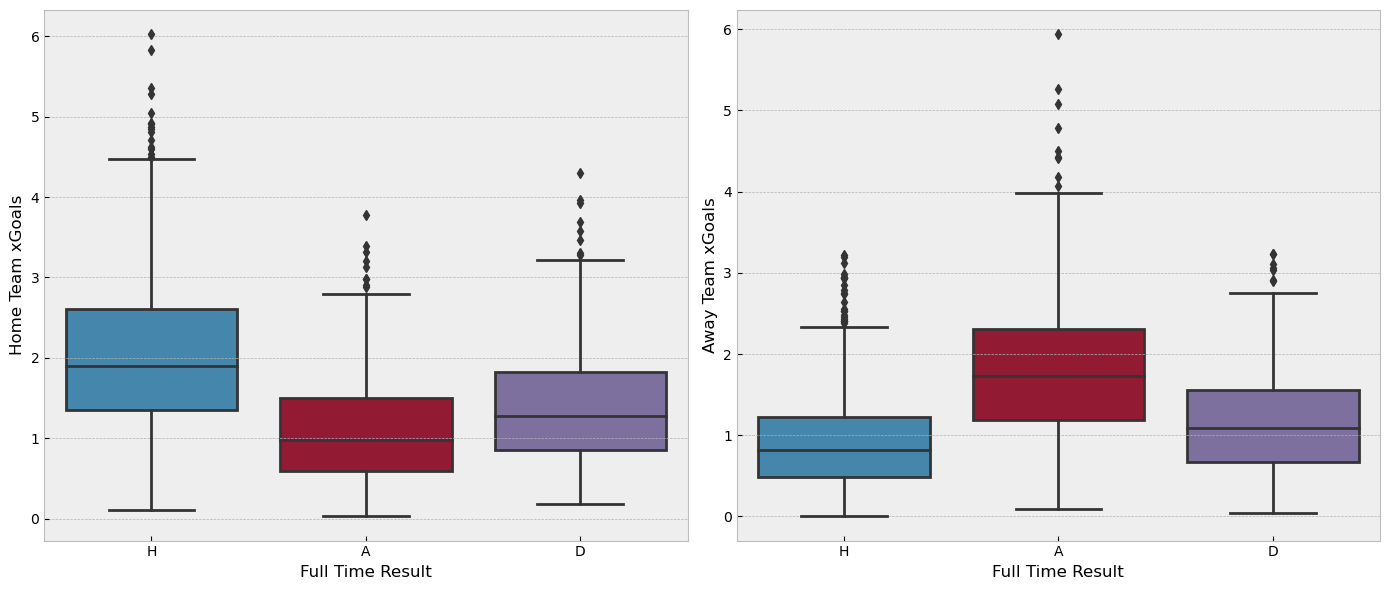

In [73]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(x='FTR', y='HxG',data=df, ax=axes[0])
axes[0].set_xlabel('Full Time Result')
axes[0].set_ylabel('Home Team xGoals')

sns.boxplot(x='FTR', y='AxG', data=df, ax=axes[1])
axes[1].set_xlabel('Full Time Result')
axes[1].set_ylabel('Away Team xGoals')

**Xgoal seems to be a good factor when it comes to predicting a football game outcome, because it indicates the high quality goal scoring opportunities a team creates per game. So when the one team has higher xGoal index than the other it is the favorite to score more goals and win the game.**

Text(0, 0.5, 'Away Team deep')

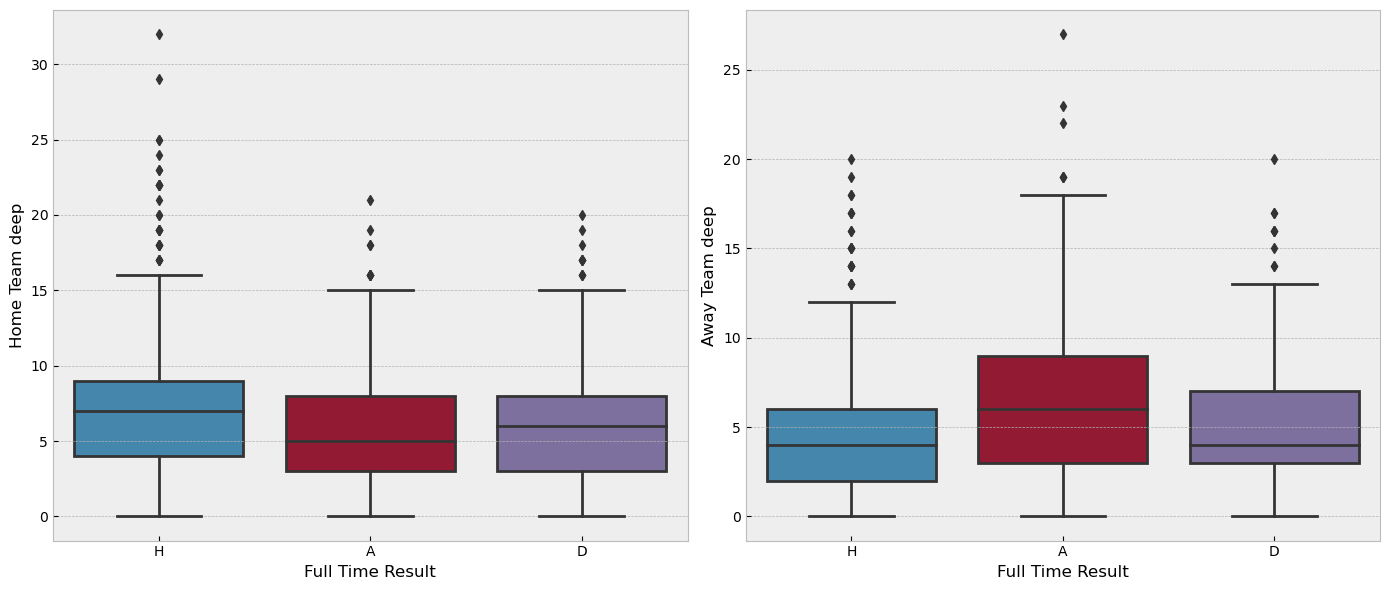

In [74]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(x='FTR', y='Hdeep',data=df, ax=axes[0])
axes[0].set_xlabel('Full Time Result')
axes[0].set_ylabel('Home Team deep')

sns.boxplot(x='FTR', y='Adeep', data=df, ax=axes[1])
axes[1].set_xlabel('Full Time Result')
axes[1].set_ylabel('Away Team deep')

**It seems that from deep we cannot actually find who the winner of the game is going to be.** That makes sense because comleting passes does not win you the game. Probably is going to be to use it in combination with other factors.

Text(0, 0.5, 'Away Team Shots on Target')

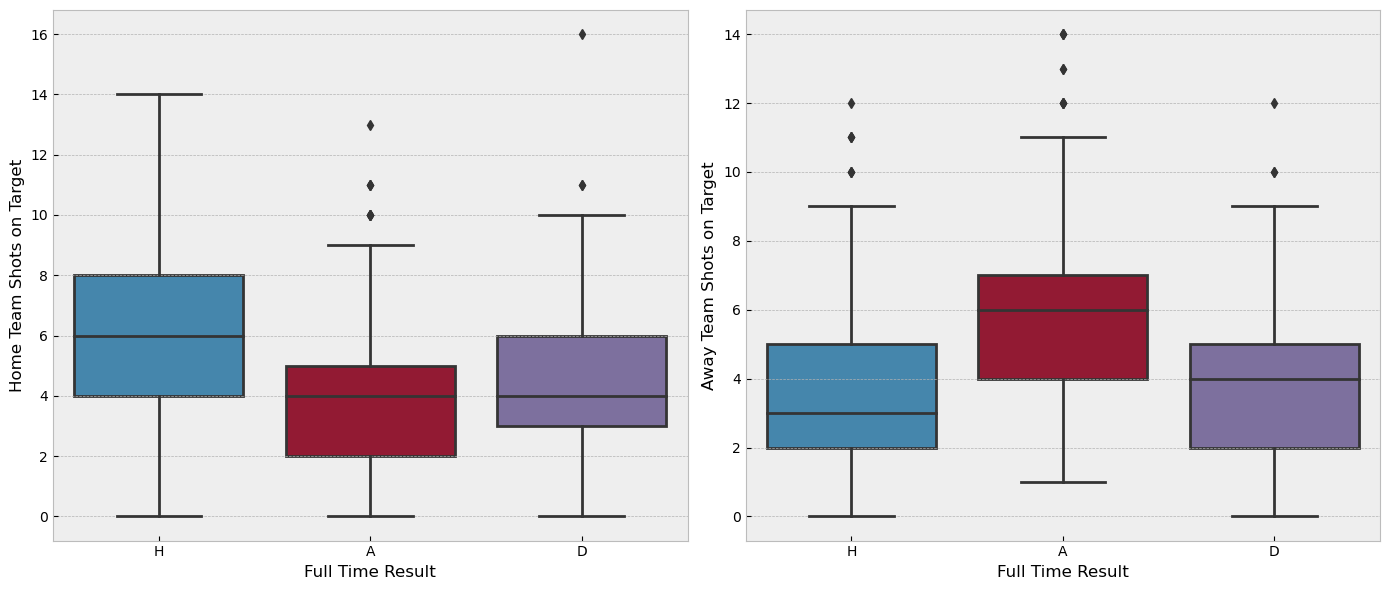

In [75]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(x='FTR', y='HST',data=df, ax=axes[0])
axes[0].set_xlabel('Full Time Result')
axes[0].set_ylabel('Home Team Shots on Target')

sns.boxplot(x='FTR', y='AST', data=df, ax=axes[1])
axes[1].set_xlabel('Full Time Result')
axes[1].set_ylabel('Away Team Shots on Target')

Maybe it is a good idea to also use a feature generated from the "HST" and "AST" columns. A team that its shot on target stat is high is not always going to win the game, but that factor indicates the the this team played better.

Text(0, 0.5, 'Away Team ppda_coef')

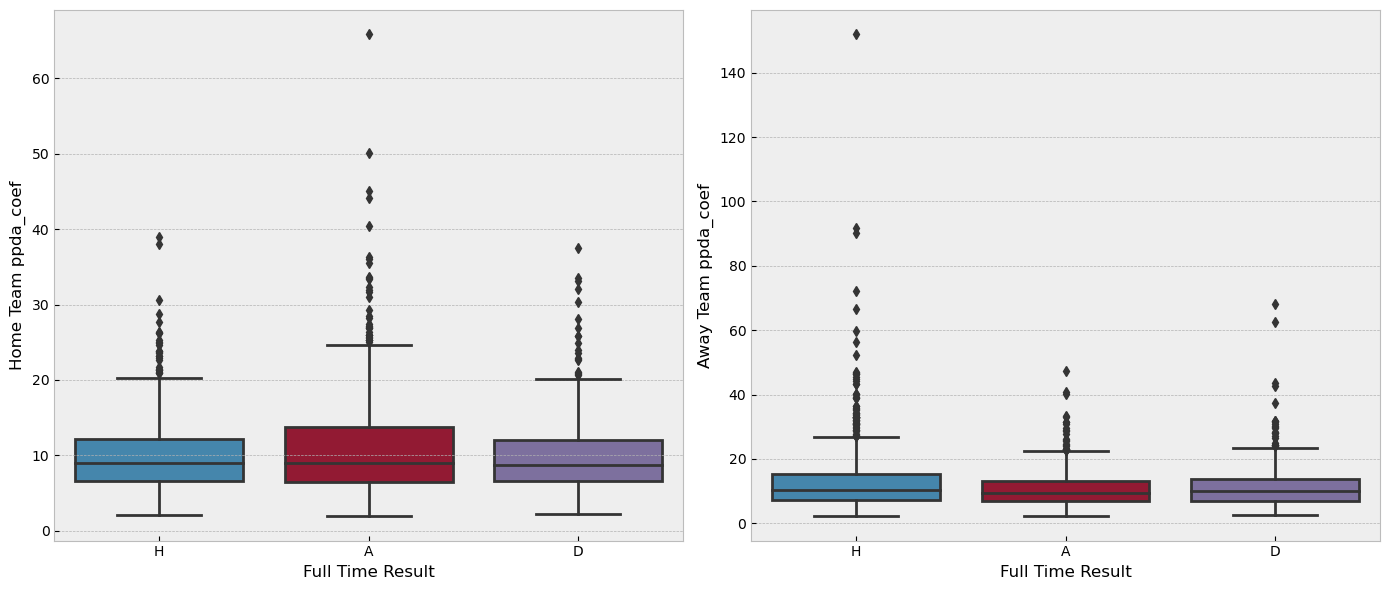

In [76]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(x='FTR', y='Hppda_coef',data=df, ax=axes[0])
axes[0].set_xlabel('Full Time Result')
axes[0].set_ylabel('Home Team ppda_coef')

sns.boxplot(x='FTR', y='Appda_coef', data=df, ax=axes[1])
axes[1].set_xlabel('Full Time Result')
axes[1].set_ylabel('Away Team ppda_coef')